# Vještačka inteligencija - Vježbe 10 - Zadaća 4

## Zadatak

### Implementacija algoritma po slobodnoj volji na proizvoljnom primjeru. Algoritmi koji su rađeni na vježbi br.7, br. 9, br. 10 su kandidati za algoritam. Također, ako želite da implementirate neki algoritam koji nije rađen na vježbama ili predavanjima, a smatrate da je odličan kandidat, možete i koristiti i takav algoritam.

## Particle Swarm Optimization (PSO) Algoritam

##### PSO je metaheuristički algoritam optimizacije inspirisan ponašanjem rojeva uočenih u prirodi, kao što su ribe i ptice. PSO je simulacija jednostavnog društvenog sistema, čija je prvobitna namjena bila da grafički simulira nepredvidljivu koreografiju ptičijeg jata. U prirodu se bilo koja vidljiva okolina ptice ograničava na neki raspon, ali postojanje više od jedne ptice omogućava svim pticama u roju da budu svjesne veće površine (fitnes funkcije). U primjeru traženja hrane od strane jata ptica koje lete preko ogromnog terena, one komuniciraju jedna s drugom tako što prave male prilagodbe svojim putanjama leta, a cijelo jato se kreće u smjeru izvora hrane. U PSO čestice komuniciraju jedna s drugom prilagođavajući svoje pozicije i brzine. Položaj svake čestice predstavlja potencijalno rješenja problema optimizacije, a čestice "istražuju" prostor pretraživanja "leteći" kroz njega. Čestice privlače najbolje rješenje do sada pronađeno, kao što se ptice kreću prema izvoru hrane. Kako se čestice približavaju najboljem rješenju, njihovo kretanje postaje koordinisanije i efikasnije, baš kao što ptice lete na sinhronizaniji način približavanjem hrani.

##### Koraci izvođenja PSO algoritma:
1. Inicijalizacija - definisanje domena problema i nasumična inicijalizacija populacije čestica
1. Evaluacija - procjena sposobnosti svake čestice na osnovu njenog položaja
1. Ažuriranje ličnog najboljeg pozicije - ažurira se lični položaj svake čestice na osnovu njene kondicione vrijednosti
1. Ažuriranje najbolje globalne pozicije - ažurira se najbolja globalna pozicija na osnovu najbolje pozicije svih čestica
1. Ažuriranje brzine i pozicije - ažurira se brzina i pozicija svake čestice na osnovu njenog trenutnog položaja i brzine, te ličnih i najboljih globalnih pozicija
1. Završetak - ponavljanje koraka 2 - 5 za fiksni broj iteracija ili dok se ne ispuni neki drugi kriterij za prekid

Iteration 1: Best Value = 1.9513246119161831
Iteration 2: Best Value = 1.9576152353603073
Iteration 3: Best Value = 1.9576152353603073
Iteration 4: Best Value = 1.9580599424871632
Iteration 5: Best Value = 1.9798358591377143
Iteration 6: Best Value = 1.989132905299496
Iteration 7: Best Value = 1.9982619255830816
Iteration 8: Best Value = 1.9999862272556936
Iteration 9: Best Value = 1.9999862272556936
Iteration 10: Best Value = 1.9999862272556936
Iteration 11: Best Value = 1.9999862272556936
Iteration 12: Best Value = 1.9999862272556936
Iteration 13: Best Value = 1.999999954868946
Iteration 14: Best Value = 1.999999954868946
Iteration 15: Best Value = 1.999999954868946
Iteration 16: Best Value = 1.999999954868946
Iteration 17: Best Value = 1.999999954868946
Iteration 18: Best Value = 1.999999954868946
Iteration 19: Best Value = 1.999999954868946
Iteration 20: Best Value = 1.999999954868946
Iteration 21: Best Value = 1.999999954868946
Iteration 22: Best Value = 1.9999999575007834
Iterati

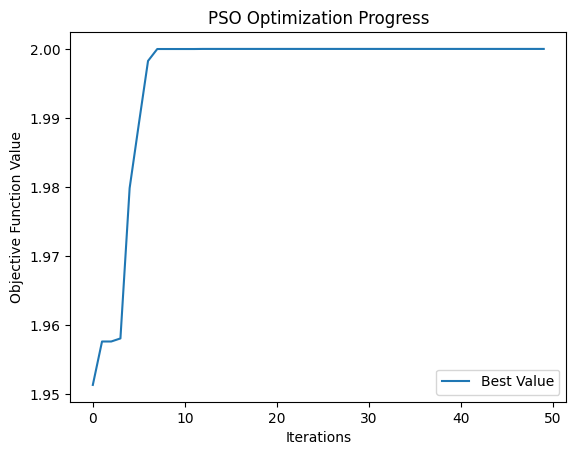

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Klasa za inicijalizaciju čestice, početne vrijednosti pozicije i brzine date su nasumično unutar određenih granica
# Najbolja pozicija je na početku trenutna pozicija, a najbolja vrijednost je minus beskonačno

class Particle:
    def __init__(self, n_dimensions, bounds):
        self.position = np.random.uniform(bounds[:, 0], bounds[:, 1], size=n_dimensions)
        self.velocity = np.random.uniform(-1, 1, size=n_dimensions)
        self.personal_best_position = self.position.copy()
        self.personal_best_value = float('-inf')

# Klasa za PSO algoritam, s parametrima:
# n_particles - broj čestica
# n_dimensions - broj dimenzija
# bounds - granice u koordinatnom sistemu [x, y]
# n_iterations - maksimalni dozvoljeni broj iteracija
# w - inercija
# c1 - spoznaja čestice
# c2 - društevni uticaj roja

class PSO:
    def __init__(self, n_particles, n_dimensions, bounds, n_iterations, w, c1, c2):
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.bounds = bounds
        self.n_iterations = n_iterations
        self.w = w
        self.c1 = c1
        self.c2 = c2
        # Generisanje niza od N čestica s parametrima broja dimenzija i granica
        self.particles = [Particle(n_dimensions, bounds) for _ in range(n_particles)]
        # Globalna najbolja pozicija i vrijednost na početku su postavljeni na prvu poziciju čestice i minus beskonačno
        self.global_best_position = self.particles[0].position.copy()
        self.global_best_value = float('-inf')
        # Niz za spremanje najboljih vrijednosti kroz iteracije
        self.best_values = []

    def objective_function(self, position):
        # Izgled simulirane funkcije
        x, y = position
        return -(np.sin(x) + np.cos(y))

    def update_particle(self, particle):
        r1, r2 = np.random.rand(self.n_dimensions), np.random.rand(self.n_dimensions)
        inertia_term = self.w * particle.velocity
        # Proračun lične i globalne pozicije na osnovu trenutnog položaja lestice
        personal_best_term = self.c1 * r1 * (particle.personal_best_position - particle.position)
        global_best_term = self.c2 * r2 * (self.global_best_position - particle.position)
        # Postavljanje novih vrijednosti čestice na osnovu izračunatih najboljih vrijednosti
        particle.velocity = inertia_term + personal_best_term + global_best_term
        particle.position = np.clip(particle.position + particle.velocity, self.bounds[:, 0], self.bounds[:, 1])
        # Izračunavanje nove vrijednosti funkcije za novu poziciju čestice
        value = self.objective_function(particle.position)
    	# Ažuriranje najbolje vrijednosti čestice ako je nova vrijednost funkcije bolja od prethodne najbolje vrijednosti
        if value > particle.personal_best_value:
            particle.personal_best_value = value
            particle.personal_best_position = particle.position.copy()
        # Ažuriranje najbolje globalne vrijednosti ako je nova vrijednost funkcije bolja od prethodne najbolje vrijednosti
        if value > self.global_best_value:
            self.global_best_value = value
            self.global_best_position = particle.position.copy()

    def run(self):
        # Pokretanje algoritma za maksimalnih N iteracija
        for iteration in range(self.n_iterations):
            for particle in self.particles:
                # Poziv metode za ažuriranje najboljih vrijednosti
                self.update_particle(particle)
            # Spremanje najbolje vrijednosti iz trenutne iteracije u niz
            self.best_values.append(self.global_best_value)
            print(f"Iteration {iteration + 1}: Best Value = {self.global_best_value}")
    
    def plot_results(self):
        plt.plot(self.best_values, label='Best Value')
        plt.xlabel('Iterations')
        plt.ylabel('Objective Function Value')
        plt.title('PSO Optimization Progress')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    # Početni (testni) podaci
    n_particles = 20
    n_dimensions = 2
    bounds = np.array([[-5, 5], [-5, 5]])
    n_iterations = 50
    w = 0.5
    c1 = 1.5
    c2 = 1.5
    # Inicijalizacija i pokretanje algoritma
    pso_algorithm = PSO(n_particles, n_dimensions, bounds, n_iterations, w, c1, c2)
    pso_algorithm.run()
    # Ispis konačnih najboljih rješenja
    print("\nOptimal Solution:")
    print(f"Best Position: {pso_algorithm.global_best_position}")
    print(f"Best Value: {pso_algorithm.global_best_value}")
    # Grafički prikaz optimizacije najboljeg rješenja kroz iteracije
    pso_algorithm.plot_results()

##### Primjer primjene PSO algoritma za potrebe optimizacije rasporeda proizvodnje u fabrici. Cilj optimizacije rasporeda proizvodnje jeste minimizacija troškova proizvodnje. U ovom primjeru fitnes funkcija je simulacija troškova na temelju rasporeda proizvodnje.

Iteration 1: Best Value = 8
Iteration 2: Best Value = -6
Iteration 3: Best Value = -16
Iteration 4: Best Value = -25
Iteration 5: Best Value = -31
Iteration 6: Best Value = -34
Iteration 7: Best Value = -39
Iteration 8: Best Value = -41
Iteration 9: Best Value = -47
Iteration 10: Best Value = -49
Iteration 11: Best Value = -54
Iteration 12: Best Value = -54
Iteration 13: Best Value = -55
Iteration 14: Best Value = -56
Iteration 15: Best Value = -56
Iteration 16: Best Value = -56
Iteration 17: Best Value = -56
Iteration 18: Best Value = -56
Iteration 19: Best Value = -56
Iteration 20: Best Value = -56
Iteration 21: Best Value = -56
Iteration 22: Best Value = -56
Iteration 23: Best Value = -56
Iteration 24: Best Value = -56
Iteration 25: Best Value = -56
Iteration 26: Best Value = -56
Iteration 27: Best Value = -59
Iteration 28: Best Value = -60
Iteration 29: Best Value = -60
Iteration 30: Best Value = -62
Iteration 31: Best Value = -64
Iteration 32: Best Value = -65
Iteration 33: Best V

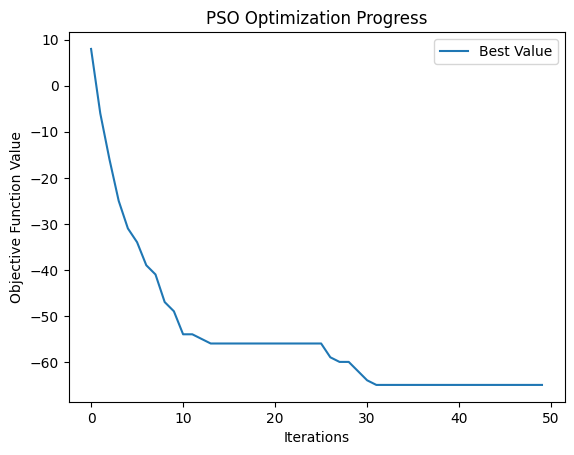

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(schedule):
    return np.sum(schedule)

def initialize_schedule(n_machines, n_jobs):
    return np.random.randint(low=1, high=10, size=(n_machines, n_jobs))

def pso_production_scheduling(n_particles, n_iterations, n_machines, n_jobs, w, c1, c2):
    particles_position = np.array([initialize_schedule(n_machines, n_jobs) for _ in range(n_particles)])
    particles_velocity = np.random.uniform(low=-1, high=1, size=(n_particles, n_machines, n_jobs))

    personal_best_positions = particles_position.copy()
    personal_best_values = np.apply_along_axis(objective_function, 2, personal_best_positions)

    global_best_position = personal_best_positions[np.unravel_index(np.argmin(personal_best_values), personal_best_values.shape)]
    global_best_value = np.min(personal_best_values)

    best_values = []

    for iteration in range(n_iterations):
        r1, r2 = np.random.rand(n_particles, n_machines, n_jobs), np.random.rand(n_particles, n_machines, n_jobs)
        particles_velocity = w * particles_velocity + c1 * r1 * (personal_best_positions - particles_position) + c2 * r2 * (global_best_position - particles_position)
        particles_position = particles_position + particles_velocity

        current_values = np.apply_along_axis(objective_function, 2, particles_position)

        update_personal_best = current_values < personal_best_values
        personal_best_values[update_personal_best] = current_values[update_personal_best]
        personal_best_positions[update_personal_best] = particles_position[update_personal_best]

        global_best_position = personal_best_positions[np.unravel_index(np.argmin(personal_best_values), personal_best_values.shape)]
        global_best_value = np.min(personal_best_values)

        best_values.append(global_best_value)

        print(f"Iteration {iteration + 1}: Best Value = {global_best_value}")

    return global_best_position, global_best_value, best_values

def plot_results(best_values):
    plt.plot(best_values, label='Best Value')
    plt.xlabel('Iterations')
    plt.ylabel('Objective Function Value')
    plt.title('PSO Optimization Progress')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    n_particles = 10
    n_iterations = 50
    n_machines = 3
    n_jobs = 5
    w = 0.5
    c1 = 1.5
    c2 = 1.5

    best_position, best_value, best_values = pso_production_scheduling(n_particles, n_iterations, n_machines, n_jobs, w, c1, c2)

    print("\nOptimal Production Schedule:")
    print(best_position)
    print(f"Best Value (Cost): {best_value}")

    plot_results(best_values)